In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 1

In [9]:
# creating time and frequency vectors
fs = 1000 # sampling frequency (Bandwidth = 2000Hz)
Ts = 1/fs # sampling period or time step: t[1] - t[0] dt 
T_total = 1 # total time of signal (s)
N = int(T_total/Ts) # number of samples

t = np.linspace(0, T_total, N) # time vector (s)
#frequencies = np.fft.fftfreq(t.size, Ts) # frequency vector (Hz)

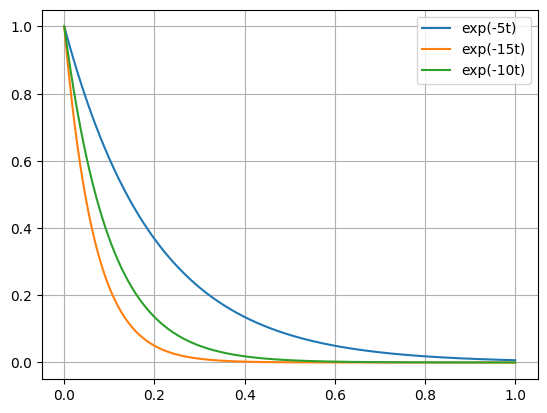

In [10]:
# creating the signals
signal_a = np.exp(-5*t)
signal_b = np.exp(-15*t)
signal_c = np.exp(-10*t)

plt.plot(t, signal_a)
plt.plot(t, signal_b)
plt.plot(t, signal_c)
plt.grid(True)
plt.legend(['exp(-5t)', 'exp(-15t)', 'exp(-10t)'])

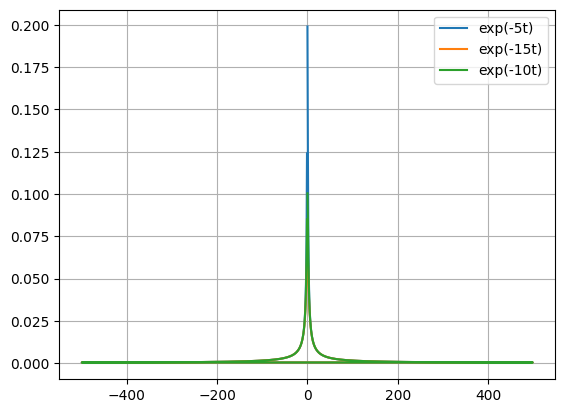

In [11]:
# obtaining the fft
frequencies = np.fft.fftfreq(t.size, Ts)

# Abs Fourier transform
fft_signal_a = np.abs(np.fft.fft(signal_a))/t.size
fft_signal_b = np.abs(np.fft.fft(signal_b))/t.size
fft_signal_c = np.abs(np.fft.fft(signal_c))/t.size

plt.plot(frequencies, fft_signal_a)
plt.plot(frequencies, fft_signal_b)
plt.plot(frequencies, fft_signal_c)
plt.legend(['exp(-5t)', 'exp(-15t)', 'exp(-10t)'])
plt.grid()

since we have to do the samething for 3 different signals, it'd be better create functions to help do it

In [12]:
def calculate_psd(signal, fs, N):
    # Calculate the fourier frequencies
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    fft_signal = np.fft.fft(signal) / N
    # Calculate the squared spectral absolute value  
    psd = np.abs(fft_signal) ** 2 
    return freqs, psd

def determine_bandwidth(signal, fs, N, power_threshold=0.95, verbose=True):
    freqs, psd = calculate_psd(signal, fs, N)

    # We only use the half of the frequencies (DFT properties)
    freqs = freqs[:len(freqs)//2]
    psd = 2*psd[:len(psd)//2]    

    # Find the frequency with maximum amplitude
    max_freq_index = np.argmax(psd)
    max_freq = freqs[max_freq_index]    
    
    # Calculate the total power (Parseval's theorem)
    total_power = np.sum(psd)

    # Initialize variables for cumulative power and bandwidth calculation
    cumulative_power = 0
    lower_index = max_freq_index
    upper_index = max_freq_index

    # Expand around the peak frequency to find the bandwidth (try to optimize this after)
    while cumulative_power / total_power <= power_threshold:
        if lower_index > 0:
            lower_index -= 1
        if upper_index < len(freqs) - 1:
            upper_index += 1
        
        cumulative_power = np.sum(psd[lower_index:upper_index+1])

    # Find the frequency where the cumulative power exceeds the threshold
    bandwidth = (freqs[lower_index], freqs[upper_index])
    
    if verbose:
        print(f"Bandwidth: {bandwidth[0]} Hz - {bandwidth[1]} Hz")
        print(f"Max amplitude frequency: {max_freq} Hz")
        print(f"Frequency range: {np.min(freqs)} Hz - {np.max(freqs)} Hz")
        print(f"Signal total power: {total_power}")

    return bandwidth


In [13]:
# Calculating the signal energy
print("Analitical solution to the signal power: 1/(2a)")
print(f'P_a = {1/(2*5):.2f}')
print(f'P_b = {1/(2*15):.2f} ')
print(f'P_c = {1/(2*10):.2f} ')

# Ts = dt
power_a = np.sum(np.abs(signal_a)**2)*Ts
power_b = np.sum(np.abs(signal_b)**2)*Ts
power_c = np.sum(np.abs(signal_c)**2)*Ts

print("\nNumerical solution to the signal power using the time domain:")
print(f'P_a = {power_a:.2f}')
print(f'P_b = {power_b:.2f}')
print(f'P_c = {power_c:.2f}')

Analitical solution to the signal power: 1/(2a)
P_a = 0.10
P_b = 0.03 
P_c = 0.05 

Numerical solution to the signal power using the time domain:
P_a = 0.10
P_b = 0.03
P_c = 0.05


In [14]:
# we want a frequency bandwidth that contains 95% of the energy
threshold = 0.95
bandwidth_a = determine_bandwidth(signal_a, fs, N, threshold, verbose=False)
bandwidth_b = determine_bandwidth(signal_b, fs, N, threshold, verbose=False)
bandwidth_c = determine_bandwidth(signal_c, fs, N, threshold, verbose=False)  

# print results
print(f"Frequency bandwidth that contains {threshold*100}% of the energy:")
print(f"Bandwidth_a = {bandwidth_a[-1]:.2f} Hz")
print(f"Bandwidth_b = {bandwidth_b[-1]:.2f} Hz")
print(f"Bandwidth_c = {bandwidth_c[-1]:.2f} Hz")

# print annalitical results
print("\nAnalitical solution to the bandwidth")
cte = np.tan(0.95*np.pi/2)/(2*np.pi)
print(f'Bandwidth_a = {5*cte:.2f}  Hz')
print(f'Bandwidth_b = {15*cte:.2f} Hz')
print(f'Bandwidth_c = {10*cte:.2f} Hz')


Frequency bandwidth that contains 95.0% of the energy:
Bandwidth_a = 7.00 Hz
Bandwidth_b = 27.00 Hz
Bandwidth_c = 17.00 Hz

Analitical solution to the bandwidth
Bandwidth_a = 10.11  Hz
Bandwidth_b = 30.33 Hz
Bandwidth_c = 20.22 Hz


error ~3Hz why?? Correct it!

Questão 2)